# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

# Data Preprocessing 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Building CNN Model & Pretraining Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras import layers, regularizers
# Download Model
import pickle

D0925 06:23:00.099333201      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0925 06:23:00.099361604      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0925 06:23:00.099365961      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0925 06:23:00.099369581      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0925 06:23:00.099372781      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0925 06:23:00.099375892      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0925 06:23:00.099379161      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0925 06:23:00.

In [2]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


# Reading Data(Image)

In [3]:
path_folder = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
class_name = os.listdir(path_folder)
class_name.sort()
class_name = class_name[7:15] + class_name[18:23] +class_name[28:]
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (200, 200))
        
        image_data.append(image)
        label_data.append(count)
    count += 1
print("-------- Done -------- ")

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Loading Folder -- Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot  The Count of Classes ==>  0
Loading Folder -- Corn_(maize)___Common_rust_  The Count of Classes ==>  1
Loading Folder -- Corn_(maize)___Northern_Leaf_Blight  The Count of Classes ==>  2
Loading Folder -- Corn_(maize)___healthy  The Count

In [4]:
class_name

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

# Preprocessing Data & Visualization

In [5]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [6]:
print(data.shape)

(42486, 200, 200, 3)


## Transform Label To One Hot Encoder

In [7]:
label_num = to_categorical(label, len(class_name))
label_num

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Shuffle Data

In [9]:
x_img, y_img =shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8, random_state=3)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33988, 200, 200, 3), (33988, 23), (8498, 200, 200, 3), (8498, 23))

# Visualizing Some Data

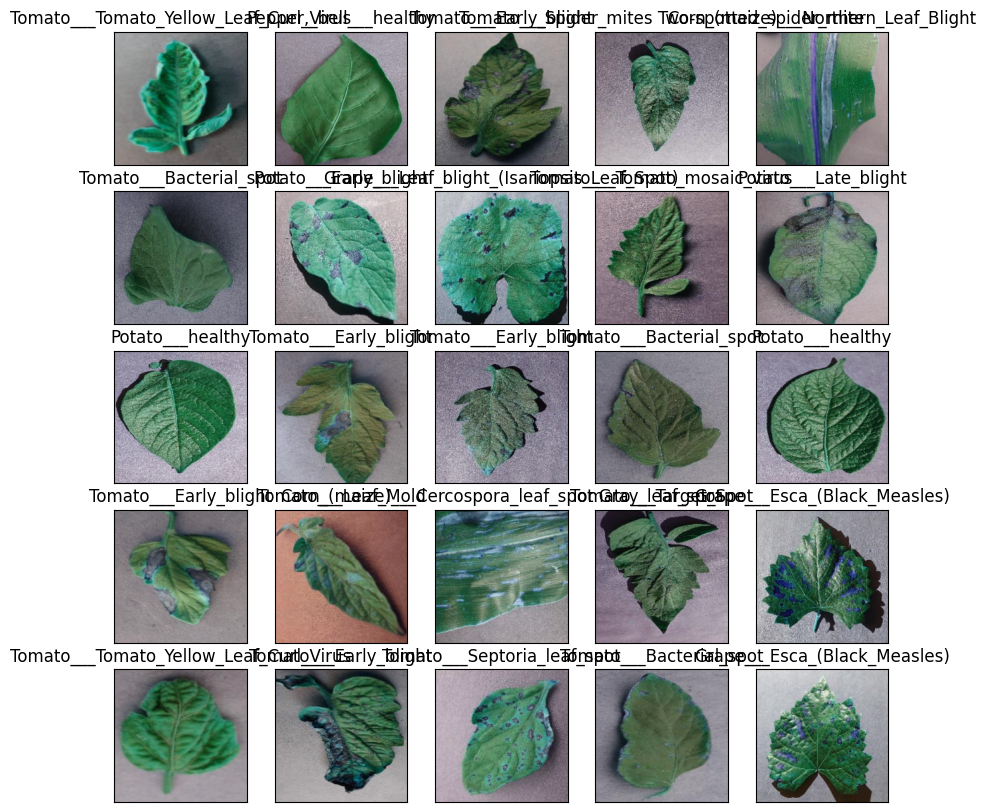

In [11]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

# Building CNN Model

In [12]:
with tpu_strategy.scope():
        model = k.models.Sequential()

        model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(200, 200, 3), padding="same"))
        model.add(k.layers.AveragePooling2D((2, 2)))

        model.add(k.layers.Conv2D(32, (4, 4), activation="relu",kernel_initializer='he_normal',  padding="same"))
        # model.add(k.layers.BatchNormalization())
        model.add(k.layers.AveragePooling2D((2, 2)))


        model.add(k.layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(l=0.01),padding="same"))
        model.add(k.layers.AveragePooling2D((2, 2)))

        model.add(k.layers.Conv2D(128, (2, 2), activation="relu", kernel_regularizer=regularizers.l2(l=0.01),padding="same"))
        model.add(k.layers.MaxPool2D((2, 2)))

        model.add(k.layers.Flatten())

        model.add(k.layers.Dense(256, activation="relu"))
        # model.add(k.layers.BatchNormalization())
        model.add(k.layers.Dropout(0.5))

        model.add(k.layers.Dense(32, activation="relu"))
        model.add(k.layers.Dropout(0.2))

        model.add(k.layers.Dense(23, activation="softmax"))



In [13]:
model.compile(optimizer="adam", 
              loss=k.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      1216      
                                                                 
 average_pooling2d (AverageP  (None, 100, 100, 16)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      8224      
                                                                 
 average_pooling2d_1 (Averag  (None, 50, 50, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 25, 25, 64)       0

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), validation_split=0.2)

Epoch 1/50


2023-09-25 06:32:42.257110: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-25 06:32:42.421221: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


1063/1063 [==============================] - ETA: 0s - loss: 2.3289 - accuracy: 0.2809

2023-09-25 06:33:24.953538: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-25 06:33:25.080573: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


1063/1063 [==============================] - 59s 47ms/step - loss: 2.3289 - accuracy: 0.2809 - val_loss: 1.6033 - val_accuracy: 0.4621
Epoch 2/50
1063/1063 [==============================] - 24s 23ms/step - loss: 1.6466 - accuracy: 0.4651 - val_loss: 1.4942 - val_accuracy: 0.5041
Epoch 3/50
1063/1063 [==============================] - 24s 23ms/step - loss: 1.3963 - accuracy: 0.5468 - val_loss: 0.9977 - val_accuracy: 0.6876
Epoch 4/50
1063/1063 [==============================] - 25s 23ms/step - loss: 1.2239 - accuracy: 0.6030 - val_loss: 0.9669 - val_accuracy: 0.6895
Epoch 5/50
1063/1063 [==============================] - 24s 23ms/step - loss: 1.1019 - accuracy: 0.6485 - val_loss: 0.7802 - val_accuracy: 0.7528
Epoch 6/50
1063/1063 [==============================] - 24s 23ms/step - loss: 1.0172 - accuracy: 0.6774 - val_loss: 0.6617 - val_accuracy: 0.7971
Epoch 7/50
1063/1063 [==============================] - 24s 23ms/step - loss: 0.9399 - accuracy: 0.7046 - val_loss: 0.6978 - val_accura

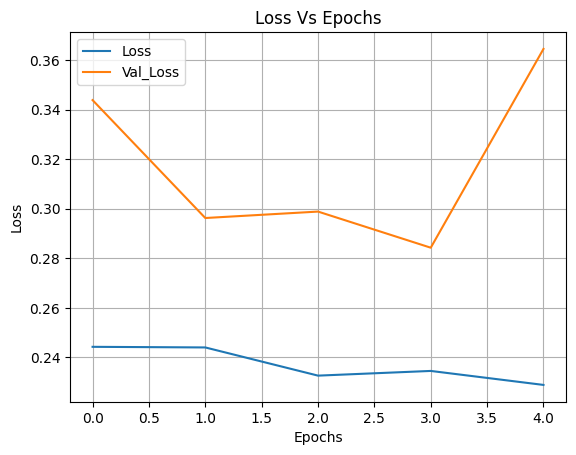

In [23]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

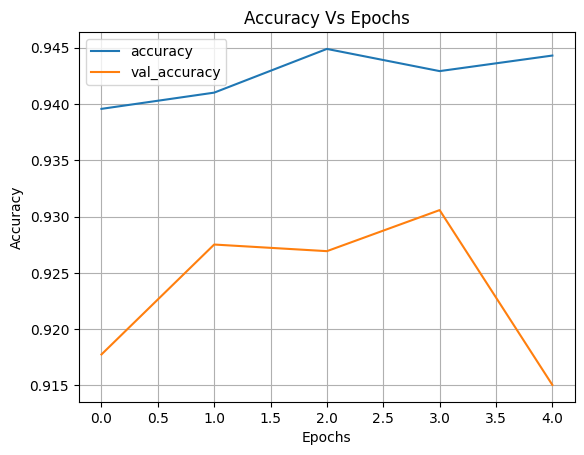

In [17]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

266/266 [==============================] - 5s 16ms/step - loss: 0.3645 - accuracy: 0.9150
The Accuracy Testing Data is ==> 0.9150388240814209 %
The loss Testing Data is ==> 0.36448830366134644


Enter the path to the image:  /kaggle/input/testing-data/Test-grapeEscaBlackMeasles.jpeg


1/1 [==============================] - 0s 460ms/step
Type Of Plant ==> Grape
Type of Plant Disease ==> _Esca_(Black_Measles)


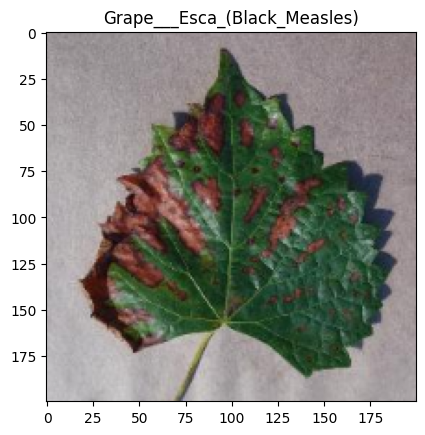

In [26]:
path_img1 = input("Enter the path to the image: ")

# Load the image
try:
    image = cv2.imread(path_img1)
    image = cv2.resize(image, (200, 200))
    image = image.astype(np.float32) / 255.0  # Normalize the image

    new_image = np.reshape(image, [1, 200, 200, 3])

    prediction = model.predict(new_image)[0]

    # Extract class and disease information from prediction
    new_prediction = class_name[np.argmax(prediction)]

    # Spliting class name into plant type and disease type
    class_parts = new_prediction.split("__")
    plant_type = class_parts[0]
    disease_type = class_parts[1]

    print("Type Of Plant ==>", plant_type)
    print("Type of Plant Disease ==>", disease_type)

    # Showing the image and label prediction
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(new_prediction)
    plt.show()

except Exception as e:
    print("An error occurred:", str(e))


In [20]:
# model_pkl_file = "plant_disease_model.pkl"  

# with open(model_pkl_file, 'wb') as file:  
#     pickle.dump(model, file)

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpku09s9ha/assets


INFO:tensorflow:Assets written to: /tmp/tmpku09s9ha/assets
